In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [108]:
nba_df = pd.read_csv('nba_2013.csv')
nba_df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [109]:
nba_df.shape

(481, 31)

In [111]:
nba_df.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [112]:
nba_df.drop('player',axis=1,inplace=True)

In [113]:
nba_df.drop('bref_team_id',axis=1,inplace=True)

In [114]:
nba_df.drop('season',axis=1,inplace=True)

In [115]:
nba_df.drop('season_end',axis=1,inplace=True)

In [116]:
nba_df.columns

Index(['pos', 'age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa',
       'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [117]:
new_pos = pd.get_dummies(nba_df['pos'],prefix='pos',drop_first=True)
new_pos.head()

,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,0,0,0,0,1,0
1,0,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,0


In [118]:
nba_df.drop('pos',axis=1,inplace=True)

In [120]:
final_df = pd.concat([nba_df,pos_upd],axis=1)

In [122]:
final_df['fg.'].fillna(final_df['fg.'].mean(),inplace=True)

In [123]:
final_df['x3p.'].fillna(final_df['x3p.'].mean(),inplace=True)

In [124]:
final_df['x2p.'].fillna(final_df['x2p.'].mean(),inplace=True)

In [125]:
final_df['efg.'].fillna(final_df['efg.'].mean(),inplace=True)

In [126]:
final_df['ft.'].fillna(final_df['ft.'].mean(),inplace=True)

In [127]:
final_df.isna().sum()

age       0
g         0
gs        0
mp        0
fg        0
fga       0
fg.       0
x3p       0
x3pa      0
x3p.      0
x2p       0
x2pa      0
x2p.      0
efg.      0
ft        0
fta       0
ft.       0
orb       0
drb       0
trb       0
ast       0
stl       0
blk       0
tov       0
pf        0
pts       0
pos_F     0
pos_G     0
pos_PF    0
pos_PG    0
pos_SF    0
pos_SG    0
dtype: int64

In [129]:
final_y = final_df['pts']

In [130]:
final_X = final_df.drop(['pts'], axis = 'columns')
final_X.shape

(481, 31)

In [131]:
final_X.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,stl,blk,tov,pf,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,23,26,30,122,0,0,0,0,1,0
1,20,81,20,1197,93,185,0.503,0,0,0.285111,...,40,57,71,203,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,0.285111,...,24,36,39,108,0,0,1,0,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,35,3,146,136,0,0,0,0,0,1
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,23,46,63,187,0,0,0,0,0,0


In [132]:
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [133]:
norm_nba = preprocessing.normalize(df1_x)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(norm_nba, df1_y, \
                                                    train_size=0.80, test_size=0.20, random_state = 100)

Accuracy is  71.40969355239008 % for knn_num: 1
Accuracy is  75.01464917892199 % for knn_num: 2
Accuracy is  75.91966565995807 % for knn_num: 3
Accuracy is  76.26315522553237 % for knn_num: 4
Accuracy is  75.4444967414313 % for knn_num: 5
Accuracy is  75.87303103724187 % for knn_num: 6
Accuracy is  74.73478158978266 % for knn_num: 7
Accuracy is  74.50547755499053 % for knn_num: 8
Accuracy is  73.90759425868352 % for knn_num: 9
Accuracy is  74.13021074557624 % for knn_num: 10
Accuracy is  73.92395330358643 % for knn_num: 11
Accuracy is  72.90897193751766 % for knn_num: 12
Accuracy is  72.61338890441236 % for knn_num: 13
Accuracy is  72.42559229616958 % for knn_num: 14
Accuracy is  71.85112342449015 % for knn_num: 15


Text(0,0.5,'R2')

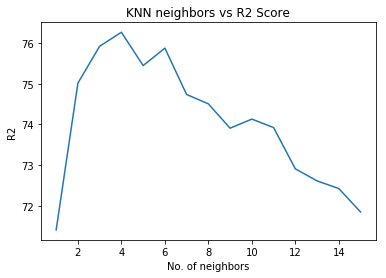

In [144]:
r2 = []
knn_list = []
for i in range(15):
    knn_num = i+1
    knn_list.append(knn_num)
    knn_cls = KNeighborsRegressor(n_neighbors = knn_num, weights='distance', algorithm='auto',metric='minkowski')
    knn_cls.fit(X_train, y_train)
    y_pred = knn_cls.predict(X_test)
    print("Accuracy is ", knn_cls.score(X_test,y_test)*100,"% for knn_num:",knn_num)
    r2.append(knn_cls.score(X_test,y_test)*100)
plt.plot(knn_list,r2)
plt.title("KNN neighbors vs R2 Score")
plt.xlabel("No. of neighbors")
plt.ylabel("R2")